In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import cmudict

nltk.download('wordnet')
nltk.download('punkt')


from nltk.corpus import stopwords

import string
from wordcloud import WordCloud

import html

! pip install contractions
import contractions

import re

from IPython.display import display

import seaborn as sns

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, f1_score, roc_auc_score, log_loss

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from pathlib import Path

SEED = 1979

do_grids = False

light_frame = True

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stubbletrouble/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stubbletrouble/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip uninstall xgboost
!pip install xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl

In [2]:
url1 = 'https://raw.githubusercontent.com/aarongalbraith/flatiron-phase5-project/main/data/drugsComTrain_raw.tsv'
url2 = 'https://raw.githubusercontent.com/aarongalbraith/flatiron-phase5-project/main/data/drugsComTest_raw.tsv'

In [3]:
d1 = pd.read_csv(url1, delimiter='\t', encoding='latin-1')
d2 = pd.read_csv(url2, delimiter='\t', encoding='latin-1')
df = pd.concat([d1,d2]).reset_index().drop(columns=['Unnamed: 0', 'index'])

In [4]:
df.drop(df[~df.condition.isin(['Birth Control', 'Emergency Contraception'])].index, inplace=True)

In [5]:
if light_frame == True:
    random_df = np.random.choice(df.index, 1000, replace=False)
    df = df[df.index.isin(random_df)]

In [6]:
def method_fix(usefulCount):
    if usefulCount % 4 == 0:
        return 'Leonardo'
    elif usefulCount % 4 == 1:
        return 'Raphael'
    elif usefulCount % 4 == 2:
        return 'Michaelangelo'
    else:
        return 'Donatello'

df['method'] = df.usefulCount.apply(method_fix)

In [7]:
engineered_features = []

In [8]:
df['target'] = df.method

In [9]:
X_train, X_test, y_train, y_test = \
train_test_split(df[['review'] + engineered_features], df['target'], test_size=0.2, random_state=SEED)

In [10]:
# reset variables

text_preprocessor = None
numerical_preprocessor = None
preprocessor = None
pipeline = None
accuracy = None
feature_names = None
coefficients = None
decision_function_values = None
importance_df = None
feature_importance = None

In [11]:
max_features = None
stop_words = []
ngram_range = (1,3)

In [12]:
text_preprocessor = TfidfVectorizer(
    max_features=max_features,
    ngram_range=ngram_range
)

numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_preprocessor, 'review'),
        ('numerical', numerical_preprocessor, engineered_features)
    ]
)

In [13]:
def run_model_1(model):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    # generate predictions for the test data
    y_pred = pipeline.predict(X_test)
    # display the training and test accuracy scores
    print(f"Training Score: {round(pipeline.score(X_train, y_train),4)} \
    \nTest Score:     {round(pipeline.score(X_test, y_test),4)}")
    
    # generate predictions for the test data
    y_pred = pipeline.predict(X_test)
    
    # calculate different evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
#     roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # display different evaluation metrics
    print(f"\nAccuracy Score: {round(accuracy, 4)}")
    print(f"F1 Macro Score: {round(f1_macro, 4)}")
#     print(f"ROC-AUC Score: {round(roc_auc, 4)}")
    
    # plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='Greens', ax=ax)
    plt.xticks(rotation=90)
    plt.show()

## XGBoost

Training Score: 1.0     
Test Score:     0.255

Accuracy Score: 0.255
F1 Macro Score: 0.2511


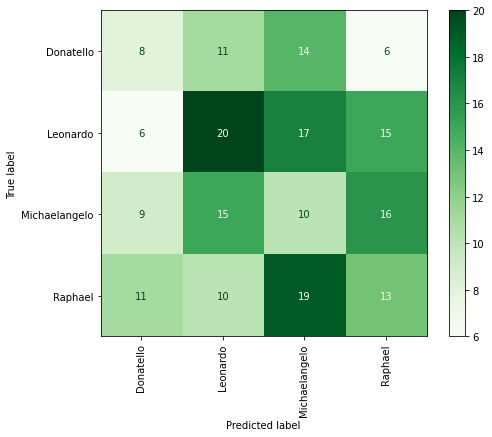

CPU times: user 1min 17s, sys: 4.54 s, total: 1min 21s
Wall time: 13.6 s


In [14]:
%%time

run_model_1(XGBClassifier(
    random_state=SEED
))